# PROJET ENL 

## I. Introduction

**Problématics**

Le dispositif représente un instrument d’étude de la conjoncture politique et de la manière dont les opinions, jugements et comportements politiques se structurent à l’approche des échéances électorales de 2007. La taille des échantillons est de 5600 personnes. Le Baromètre Politique Français part de l’idée que l’on ne peut comprendre les dynamiques et évolutions de l’électorat si l’on ne dispose pas d’observations conduites très en amont de la campagne électorale. Ainsi, cette vague du BPF a été réalisée plus d’un an avant l’échéance présidentielle de 2007. Cette vague du BPF se compose, outre les renseignements signalétiques classiques (age, sexe, profession, etc...), des indicateurs de politisation, ceux concernant le rapport à la politique, les valeurs et univers de représentations sociales des électeurs, leur perception des enjeux et thèmes politiques, leur degré d’adhésion à des propositions politiques. De plus, des questions portent sur le thème du " modèle social français " et du " déclin " de la France. Il s’agit de mesurer les perceptions des électeurs sur les contours de ce " modèle social français ", ses faiblesses et points forts, mais également de mesurer les opinions sur la préservation ou la réforme de ce modèle.

**Question**

On s’intéresse à la probabilité de vote (variables Q46A à Q46P) que l’on recodera en variable binaire : Y = 1 si vote tout à fait probable ou plutôt probable, sinon Y = 0

**Solution**

Ce projet consiste deux partie, avec chacun un modèle permettant de prédire la probabilité de vote Y=1 ou Y=0

## PREPARATION DE DONNÉES

In [1]:
import pandas as pd
import os
import pyreadstat
import numpy as np
import random

seed_value = 8
np.random.seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

In [2]:
df,meta = pyreadstat.read_sav("fr.cdsp.ddi.BPF2007-R1_F1.sav")

In [3]:
df

,QUEST,VAGUE,DATE_TER,DPT,REG,CCM,AGGLO,GR,REGA,NATIO,...,RCRS13,RCRS15,RCPRE,RCREG,REFPROX,RED1,RED2,RED3,RED4,REDDEF
0,1.0,1.0,1.336271e+10,43.0,8.0,6.0,1.0,5.0,83.0,1.0,...,3.0,2.0,4.0,3.0,4.0,93286.0,93079.0,115671.0,138610.0,0.93286
1,2.0,1.0,1.336271e+10,19.0,7.0,6.0,1.0,5.0,74.0,1.0,...,3.0,4.0,2.0,2.0,3.0,75467.0,79476.0,83044.0,73570.0,0.75467
2,3.0,1.0,1.336271e+10,19.0,7.0,1.0,3.0,5.0,74.0,1.0,...,1.0,2.0,2.0,7.0,3.0,76974.0,64144.0,119251.0,121849.0,0.76974
3,4.0,1.0,1.336271e+10,18.0,5.0,2.0,1.0,5.0,24.0,1.0,...,3.0,2.0,1.0,3.0,5.0,222342.0,179811.0,112919.0,135954.0,2.22342
4,5.0,1.0,1.336297e+10,43.0,8.0,4.0,2.0,5.0,83.0,1.0,...,3.0,2.0,7.0,7.0,3.0,137731.0,124963.0,104551.0,110822.0,1.37731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,5646.0,1.0,1.336297e+10,81.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,2.0,7.0,4.0,4.0,138827.0,247272.0,89199.0,261463.0,1.38827
5646,5647.0,1.0,1.336297e+10,65.0,7.0,1.0,3.0,3.0,73.0,1.0,...,1.0,2.0,6.0,7.0,3.0,188565.0,114400.0,157698.0,167757.0,1.88565
5647,5648.0,1.0,1.336297e+10,46.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,4.0,5.0,2.0,1.0,77395.0,97742.0,71277.0,51534.0,0.77395
5648,5649.0,1.0,1.336297e+10,46.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,4.0,1.0,2.0,3.0,22543.0,37974.0,92590.0,67622.0,0.22543


**Convention de nom**

In [4]:
df.columns = df.columns.str.lower()

In [5]:
variables_contextes = ["rcrs2", # Diplôme le plus élevé
                      "rcrs7",  # Profession
                      "rcrs13", # Origine Parents
                      "rage",   # Tranche d'age
                      "sexe",   # Sexe
                      "gr",     # Grand région
                      "rrs8",   # Situation professionnelle
                      "q48",    # Situation familiale
                      "rcrs15"  # Religion
                      ]  

variables_opinions = ["q17e",     # Opinion sur les immigrés
                     "q12a", "q12b",  # Problèmes en France
                     "q14",     # Chômage
                     "q15",     # Délinquance
                     "q17b",    # Homosexualité
                     "q18",     # France en déclin
                     "q37", "q38",  # TV
                     "q44",     # Mondialisation
                     "q17d"]    # Peine de mort

target = "q46l"  # Y

In [6]:
df1 = df[variables_contextes + variables_opinions + [target]].copy()
df1.head(5)

,rcrs2,rcrs7,rcrs13,rage,sexe,gr,rrs8,q48,rcrs15,q17e,...,q12b,q14,q15,q17b,q18,q37,q38,q44,q17d,q46l
0,2.0,5.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,3.0,...,2.0,3.0,2.0,2.0,2.0,5.0,1.0,2.0,4.0,2.0
1,4.0,5.0,3.0,4.0,1.0,5.0,3.0,1.0,4.0,2.0,...,9.0,2.0,2.0,3.0,2.0,7.0,6.0,2.0,3.0,4.0
2,1.0,6.0,1.0,5.0,2.0,5.0,3.0,8.0,2.0,4.0,...,7.0,1.0,3.0,1.0,2.0,7.0,3.0,2.0,4.0,4.0
3,1.0,5.0,3.0,5.0,2.0,5.0,3.0,7.0,2.0,2.0,...,3.0,4.0,3.0,2.0,2.0,7.0,2.0,3.0,2.0,4.0
4,4.0,6.0,3.0,2.0,2.0,5.0,1.0,2.0,2.0,3.0,...,11.0,2.0,3.0,2.0,3.0,5.0,2.0,3.0,2.0,2.0


**Proportion entre Vote/Non**

In [7]:
# Renommer la colonne cible (Y)
df1.rename(columns={target: "target"}, inplace=True)

In [8]:
print(df1["target"].value_counts(normalize=True) * 100)  # Verification

4.0    43.769912
2.0    27.610619
1.0    16.176991
3.0    12.247788
6.0     0.159292
5.0     0.035398
Name: target, dtype: float64


Comme on cherche à modéliser un modèle binaire, il suffit de transformer ces 6 modalité en 2:

In [9]:
# Replacing target values with 1 or 0
df1["target"] = df1["target"].apply(lambda x: 1 if x in [1, 2] else 0)
print(df1["target"].value_counts(normalize=True) * 100)  # Verification

0    56.212389
1    43.787611
Name: target, dtype: float64


La proportion de vote dans notre cas est de xx : yy

**Correction des valeurs manquantes**

In [10]:
# Verifier les valeurs manquantes
df1.isnull().sum()

rcrs2       0
rcrs7       0
rcrs13      0
rage        0
sexe        0
gr          0
rrs8        0
q48         0
rcrs15      0
q17e        0
q12a        0
q12b        6
q14         0
q15         0
q17b        0
q18         0
q37         8
q38       203
q44         0
q17d        0
target      0
dtype: int64

On observe qu'il y a 3 colonnes contiennnent les valeurs. En considérant la documentation des variables, on constate que chacune de ces trois variables a une valeur pour les réponse invalide/non réponse/non concerné:
- q12b: 99
- q37: 88
- q38: 99

On recodage donc ces valeurs manquantes:

In [11]:
# Corriger les valeurs manquantes
df1["q12b"].fillna(99, inplace=True)
df1["q37"].fillna(88, inplace=True)
df1["q38"].fillna(99, inplace=True)

En suite, comme toutes les variables sont qualitatives, on les transforme sous type *"categorical"* en Python

In [12]:
df1.dtypes

rcrs2     float64
rcrs7     float64
rcrs13    float64
rage      float64
sexe      float64
gr        float64
rrs8      float64
q48       float64
rcrs15    float64
q17e      float64
q12a      float64
q12b      float64
q14       float64
q15       float64
q17b      float64
q18       float64
q37       float64
q38       float64
q44       float64
q17d      float64
target      int64
dtype: object

In [13]:
# Transformer d'abord à integer pour éviter le virgule et les decimales
df1 = df1.apply(lambda col: pd.to_numeric(col, downcast='integer', errors='coerce'))
# Transformer en suite à catégorielles
df1 = df1.apply(lambda col: col.astype("category"))
df1.head(5)

,rcrs2,rcrs7,rcrs13,rage,sexe,gr,rrs8,q48,rcrs15,q17e,...,q12b,q14,q15,q17b,q18,q37,q38,q44,q17d,target
0,2,5,3,2,2,5,2,2,2,3,...,2,3,2,2,2,5,1,2,4,1
1,4,5,3,4,1,5,3,1,4,2,...,9,2,2,3,2,7,6,2,3,0
2,1,6,1,5,2,5,3,8,2,4,...,7,1,3,1,2,7,3,2,4,0
3,1,5,3,5,2,5,3,7,2,2,...,3,4,3,2,2,7,2,3,2,0
4,4,6,3,2,2,5,1,2,2,3,...,11,2,3,2,3,5,2,3,2,1


In [14]:
df1.dtypes

rcrs2     category
rcrs7     category
rcrs13    category
rage      category
sexe      category
gr        category
rrs8      category
q48       category
rcrs15    category
q17e      category
q12a      category
q12b      category
q14       category
q15       category
q17b      category
q18       category
q37       category
q38       category
q44       category
q17d      category
target    category
dtype: object

## PARTIE I: LA REGRESSION LOGISTIQUE

### 1. Modèles des variables contextes

#### 1.1. Préparation de données d'entrainement

In [ ]:
df1a = df1[variables_contextes + ["target"]].copy()
df1a.head(5)

In [ ]:
unique_values_count = df1a.drop(columns="target").nunique()
print(unique_values_count)

In [ ]:
total = sum(unique_values_count)
print("L'encodage créera donc", total, "nouvelles colonnes")

In [ ]:
# Dumminiser tous les variables explicatives
df1a_dummies = pd.get_dummies(df1a.drop(columns="target"))

# Recoller la colonne "target"
df1a_encoded = pd.concat([df1a_dummies, df1a["target"]], axis=1)

df1a_encoded.head(5)

In [ ]:
# On vérifie bien qu'il y a 53 colonnes + 1 colonne de target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1a_encoded, 
                                                    df1a_encoded['target'],
                                                    test_size = 0.2, 
                                                    stratify = df1a_encoded['target'],
                                                    random_state = 0) 
del X_train['target'], X_test['target']

In [ ]:
# Vérification de stratify
for i in ['train','test']:
    print(f"Echantillon {i}: Part y=1 : {round(y_train.astype(int).mean(), 4)}")

In [ ]:
X_train.head(5)

In [ ]:
y_train.head(5)

#### 1.2. Modèle de base

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import random
# np.random.seed(8)

# Create the LogisticRegression estimator with default parameters
model = LogisticRegression(max_iter = 1000)

# Fit the model to the training data
model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Make predictions on the training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
for a in np.arange(0.01, 1.0, 0.1):
    print(a)
    model = LogisticRegression(max_iter = 1000, class_weight = {0:a, 1:(1-a)})
    model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt 
    labels = ["Non", "Voter"]

    # Calculate the confusion matrix for the test data
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)

    plt.title("Confusion Matrix - Test")
    plt.show()
    from sklearn.metrics import classification_report

    # Generate the classification report
    report = classification_report(y_test, y_test_pred)
    print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
labels = ["Non", "Voter"]

# Calculate the confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_test_pred)
print(report)

On constate qu'en terme de l'accuracy, le modèle classifie avec l'accuracy d'environ de 60%. En terme de performance, il classe mieux les *Non-voter* par rapport aux *Voter*

#### 1.2. Optimisation du modèle

**Structure de fonction d'optimisation**:

On cherche à améliorer les paramètres pour mieux classer la classe positive (y=1). La fonction d'optimisation utilise:
- Input: X, Y, searcher (BayesSearchCV, RandomizedSearchCV ou Optuna) et Scoring metrique (balanced accuracy, f1, precision, recall ou roc-auc)
- Output: les meilleurs paramètres, le résumé du modèle, la confusion matrice sur l'ensemble de test et la courbe ROC-AUC.

In [ ]:
#!pip install -q optuna

In [ ]:
def optimiser(searcher, scorer):
    if searcher not in ('BayesSearchCV', 'RandomizedSearchCV', 'Optuna'):
        return('Wrong searcher')
    print('Searcher:', searcher,',', 'Scorer:', scorer)
    # Params dict for BayesSearchCV and RandomizedSearchCV
    # Import libraries
    from sklearn.linear_model import LogisticRegression
    from skopt.space import Real,Integer,Categorical # for BayesSearch
    from scipy.stats import uniform # for RandomizedSearch
    from sklearn.model_selection import cross_val_score # for Optuna
    from skopt import BayesSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    import optuna

    # BayesSearchCV
    if searcher == 'BayesSearchCV':
        # Définir l'espace de recherche pour les hyperparamètres
        # Lasso (pénalisation L1)
        param_dict_l1 = {
            'penalty': Categorical(['l1']), 
            'solver': Categorical(['liblinear','saga']),
            'tol': Real(0,1, prior='uniform'),
            'C':Real(0,0.9, prior='uniform'),
            'max_iter': [1000],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced']
        }
        # Ridge (pénalisation L2)
        param_dict_l2 = {
            'penalty': Categorical(['l2']), 
            'solver': Categorical(['newton-cg', 'lbfgs', 'saga']),
            'tol': Real(0,1, prior='uniform'),
            'C':Real(0,0.99, prior='uniform'),
            'max_iter': [1000],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced']
        }  
        # Elastic Net (pénalisation L1+L2)
        param_dict_elasticnet = {
            'penalty': Categorical(['elasticnet']), 
            'solver': Categorical(['saga']),
            'l1_ratio' : Real(0,0.99, prior='uniform'),
            'tol': Real(0,1, prior='uniform'),
            'C':Real(0,0.99, prior='uniform'),
            'max_iter': [1000],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced']
        }
        # Définir l'optimiseur
        opt = BayesSearchCV(LogisticRegression(),
                            [(param_dict_elasticnet,10),
                             (param_dict_l1,10),
                             (param_dict_l2,10)],
                            cv = 5,
                            scoring = scorer)
        opt.fit(X_train, y_train)
        best_params = opt.best_params_
        
    # RandomizedSearchCV 
    if searcher == 'RandomizedSearchCV':
        # Définir l'espace de recherche pour les hyperparamètres
        param_distributions = {
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'newton-cg', 'saga'],
        'C': uniform(loc=0, scale=10),
        'tol': uniform(loc=0, scale=1),
        'max_iter': [100, 1000, 10000, 100000],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']    
        }
        
        # Définir l'optimiseur
        opt = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=param_distributions,
                                 cv=5,
                                 scoring=scorer)
        opt.fit(X_train, y_train)
        best_params = opt.best_params_

    # Optuna 
    if searcher == 'Optuna':
        # Définir l'espace de recherche pour les hyperparamètres
        def objective(trial):
            penalty = trial.suggest_categorical('penalty', ["l1", "l2"])
            solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
            C = trial.suggest_float('C', 0.01, 10)  # Wider range for C
            class_weight = trial.suggest_categorical('class_weight', ["balanced", None])
            max_iter = trial.suggest_int('max_iter', 100, 100000)  # Extend range for max_iter
            
            
            model = LogisticRegression(solver=solver, 
                                       penalty=penalty, 
                                       C=C,
                                       class_weight=class_weight, 
                                       max_iter=max_iter)

            return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, 
                                   scoring=scorer).mean()

        opt = optuna.create_study(direction='maximize')
        opt.optimize(objective, n_trials=20)
        best_params = opt.best_params
    
    # Extracting result
    #1. Best params
    print("\n Paramètres optimaux : ")
    print(best_params)
    
    #2. Model summary
    from sklearn.metrics import classification_report
    # Define best model
    reg_log = LogisticRegression(**best_params)
    reg_log.fit(X_train, y_train)
    # Predict on y_test
    y_test_pred = reg_log.predict(X_test)
    # Reporting
    report = classification_report(y_test, y_test_pred)
    print(report)
    
    #3. Confusion matrix on Test
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt 
    labels = ["Non", "Voter"]
    # Calculate the confusion matrix for the test data
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Test")
    plt.show()
    
    #4. ROC-AUC curve
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    # Extract values
    y_train_predict_RL = reg_log.predict(X_train)
    y_test_predict_RL = reg_log.predict(X_train)
    y_train_predict_proba_RL = reg_log.predict_proba(X_train)[:,1]
    y_test_predict_proba_RL = reg_log.predict_proba(X_test)[:,1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba_RL)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba_RL)
    roc_auc_test = auc(fpr_test, tpr_test)
    # Plotting
    lw = 2
    plt.plot(fpr_train, tpr_train, color='darkorange',
             lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

    plt.plot(fpr_test, tpr_test, color='darkgreen',
             lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparaison courve ROC (TRAIN / TEST)')
    plt.legend(loc="lower right")
    plt.show()
    
    # Output saved best fitted model
    return reg_log

In [ ]:
# np.random.seed(8)
for i in ('BayesSearchCV', 'RandomizedSearchCV', 'Optuna'):
    for j in ('balanced_accuracy', 'recall', 'precision', 'f1', 'roc_auc'):
        optimiser(searcher = i, scorer = j)

On constate que dans notre cas:
- La métrique de scoring F1 adapte le meilleur. Elle améliore notre modèle en prenant en compte à la fois le précision et le recall sur les deux classes.
- Les trois chercheur de paramètres montre un résultat similaire: On obtiens très souvant un meilleur modèle (avec le F1-score) avec d'environ 370 TN et 300 TP. En terme de la performance et le résultat final, on conclut que le BayesSearch nous donne le meilleur modèle: 380 TN et 301 TP, le precision, recall et f1 sont proches entre les deux classes. Un seul soucis avec ce modèle: il est légèrement sur-apprentisage avec la courbe ROC 0.67 sur le train mais 0.62 sur le test

In [ ]:
model1 = optimiser('BayesSearchCV', 'f1')

In [ ]:
# Params de Messaoud
best_params = {
    'C': 0.4421244891227494,
    'class_weight': 'balanced',
    'fit_intercept': False,
    'max_iter': 1000,
    'penalty': 'l1',
    'solver': 'liblinear',
    'tol': 0.052132926431018536
}

# Extracting result
#1. Best params
print("\n Paramètres optimaux : ")
print(best_params)

#2. Model summary
from sklearn.metrics import classification_report
# Define best model
reg_log = LogisticRegression(**best_params)
reg_log.fit(X_train, y_train)
# Predict on y_test
y_test_pred = reg_log.predict(X_test)
# Reporting
report = classification_report(y_test, y_test_pred)
print(report)

#3. Confusion matrix on Test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
labels = ["Non", "Voter"]
# Calculate the confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test")
plt.show()

#4. ROC-AUC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Extract values
y_train_predict_RL = reg_log.predict(X_train)
y_test_predict_RL = reg_log.predict(X_train)
y_train_predict_proba_RL = reg_log.predict_proba(X_train)[:,1]
y_test_predict_proba_RL = reg_log.predict_proba(X_test)[:,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba_RL)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba_RL)
roc_auc_test = auc(fpr_test, tpr_test)
# Plotting
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()


#### 1.3. Evaluation du modèle

**Tableau de coefficient**

In [ ]:
table_coeff = pd.DataFrame()
table_coeff["Variable"] = X_train.columns
table_coeff["Coefficient"] = model1.coef_[0]
table_coeff.head()

In [ ]:
table_coeff_pos = table_coeff[table_coeff['Coefficient']>=0]
table_coeff_neg = table_coeff[table_coeff['Coefficient']<0]

In [ ]:
table_coeff_pos.sort_values(by = 'Coefficient', ascending = False)[0:5]

Les caractéristiques des personnes qui est plus susceptible de voter pour Sarkozy:
- Être Catholique pratiquant (RCRS15 = 1)
- Avoir retraité (RRS8 = 3)
- Être veuf ou veuve vivant en couple (Q48 = 8)
- Être un(e) artisane, commerçant, chef(e) d'entreprise (RCRS7 = 2)
- N'avoir pas de diplôme, certificat d'études

In [ ]:
table_coeff_neg.sort_values(by = 'Coefficient', ascending = True)[0:5]

Caracteristique des personnes qui est moins susceptible de voter pour Sarkozy:
- Être enseignant (RCRS7 = 4)
- N'avoir pas de réligion (RCRS15 = 4)
- Avoir de diplôme de l'enseignement supérieur (RCRS2 = 5)
- Être divorcé(e) vivant en couple (Q48 = 6)
- Venir de Grand Ouest (GR = 2)

Dans chacun des deux derniers cas, la religion joue le rôle de l'indicateur important quant à la décision de voter ou non pour la candidature de Sarkozy. Ensuite, on observe la caractéristique de la profession, avec une probabilité plus élevée de vote pour les retraités et une probabilité plus élevée de ne pas voter pour les enseignants.

## Data Augmentation 

### Voteur non-fiable exclu

In [ ]:
# List of column names
column_names = ['q46a', 'q46b', 'q46c', 'q46d', 'q46e', 'q46f', 'q46g', 'q46h', 'q46i', 'q46j', 'q46k', 'q46l', 'q46m', 'q46n', 'q46o', 'q46p']

df1 = df[variables_contextes + variables_opinions + column_names].copy()

#### Les ne-sait-pas (9 observations)

Modalité 6 (Nsp) n'indique pas une probabilité fiable pour le fait que le répondeur va voter pas. Il ne rends pas donc une information fiable pour notre estimateur

In [ ]:
filter_condition = df1[column_names].isin([6]).any(axis=1)

# Drop rows that meet the filter condition
df1 = df1[~filter_condition]

#### Les rien-voter

In [ ]:
# Loop through each column name in column_names
for col_name in column_names:
    df1[col_name] = df1[col_name].apply(lambda x: 1 if x in [1, 2] else 0)

# Create the 'no_vote' column by summing the selected columns
df1['no_vote'] = df1[column_names].sum(axis=1)

# Calculate the value counts of the 'no_vote' column and sort them in descending order
sorted_no_vote_counts = df1['no_vote'].value_counts().sort_index()

# Print the sorted value counts
print(sorted_no_vote_counts)

Il y a 175 qui ne veux rien voter. Ces personnes ne donnent pas l'information à notre modèle de prédiction

In [ ]:
# Find the index locations where 'no_vote' equals 0
index_of_zero = df1.index[df1['no_vote'] == 0].tolist()

# Print the index locations
print(index_of_zero)

In [ ]:
df1 = df[variables_contextes + variables_opinions + [target]].copy()
df1 = df1[~df1.index.isin(index_of_zero)]
len(df1)

In [ ]:
# Renommer la colonne cible (Y)
df1.rename(columns={target: "target"}, inplace=True)

In [ ]:
print(df1["target"].value_counts(normalize=True) * 100)  # Verification

Comme on cherche à modéliser un modèle binaire, il suffit de transformer ces 6 modalité en 2:

In [ ]:
# Replacing target values with 1 or 0
df1["target"] = df1["target"].apply(lambda x: 1 if x in [1, 2] else 0)
print(df1["target"].value_counts(normalize=True) * 100)  # Verification

La proportion de vote dans notre cas est de xx : yy

In [ ]:
# Corriger les valeurs manquantes
df1["q12b"].fillna(99, inplace=True)
df1["q37"].fillna(88, inplace=True)
df1["q38"].fillna(99, inplace=True)

In [ ]:
# Transformer d'abord à integer pour éviter le virgule et les decimales
df1 = df1.apply(lambda col: pd.to_numeric(col, downcast='integer', errors='coerce'))
# Transformer en suite à catégorielles
df1 = df1.apply(lambda col: col.astype("category"))
df1.head(5)

In [ ]:
df1.dtypes

In [ ]:
df1a = df1[variables_contextes + ["target"]].copy()
df1a.head(5)

In [ ]:
total = sum(unique_values_count)
print("L'encodage créera donc", total, "nouvelles colonnes")

In [ ]:
# Dumminiser tous les variables explicatives
df1a_dummies = pd.get_dummies(df1a.drop(columns="target"))

# Recoller la colonne "target"
df1a_encoded = pd.concat([df1a_dummies, df1a["target"]], axis=1)

df1a_encoded.head(5)

In [ ]:
# On vérifie bien qu'il y a 53 colonnes + 1 colonne de target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1a_encoded, 
                                                    df1a_encoded['target'],
                                                    test_size = 0.2, 
                                                    stratify = df1a_encoded['target'],
                                                    random_state = 8) 
del X_train['target'], X_test['target']

In [ ]:
# Vérification de stratify
for i in ['train','test']:
    print(f"Echantillon {i}: Part y=1 : {round(y_train.astype(int).mean(), 4)}")

In [ ]:
X_train.head(5)

In [ ]:
y_train.head(5)

In [ ]:
reg_log.fit(X_train, y_train)

#### 1.2. Modèle de base

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression estimator with default parameters
model = LogisticRegression(max_iter = 1000, random_state = 8)

# Fit the model to the training data
model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Make predictions on the training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
labels = ["Non", "Voter"]

# Calculate the confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_test_pred)
print(report)

**Modele optimise**

In [ ]:
# Espace de recherche des paramètres
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the F1-score scorer
f1_scorer = make_scorer(f1_score)

opt = BayesSearchCV(LogisticRegression(),
                    [(param_dict_bayes_elasticnet,10),
                     (param_dict_bayes_l1,10),
                     (param_dict_bayes_l2,10)],
                    cv = 5,
                    scoring = 'average_precision',
                    random_state = 8)  

start = timer()  
opt.fit(X_train, y_train)
delais = timer() - start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes = opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))
from sklearn.metrics import confusion_matrix

reg_log = LogisticRegression(**opt.best_params_, random_state = 8)
reg_log.fit(X_train, y_train)

y_test_pred = reg_log.predict(X_test)

# Confusion matrix and report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
labels = ["Non", "Voter"]

# Calculate the confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_test_pred)
print(report)

### 2. Modèles des variables d'opinions

#### 1.1. Préparation de données d'entrainement

In [ ]:
df1a = df1[variables_opinions + ["target"]].copy()
df1a.head(5)

In [ ]:
unique_values_count = df1a.drop(columns="target").nunique()
print(unique_values_count)

In [ ]:
total = sum(unique_values_count)
print("L'encodage créera donc", total, "nouvelles colonnes")

In [ ]:
# Dumminiser tous les variables explicatives
df1a_dummies = pd.get_dummies(df1a.drop(columns="target"))

# Recoller la colonne "target"
df1a_encoded = pd.concat([df1a_dummies, df1a["target"]], axis=1)

df1a_encoded.head(5)

In [ ]:
# On vérifie bien qu'il y a 57 colonnes dumminisés + 1 colonne de target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1a_encoded, 
                                                    df1a_encoded['target'],
                                                    test_size=0.2, 
                                                    stratify=df1a_encoded["target"],
                                                    random_state = 8) 
del X_train['target'], X_test['target']

In [ ]:
# Vérification de stratify
for i in ['train','test']:
    print(f"Echantillon {i}: Part y=1 : {round(y_train.astype(int).mean(), 4)}")
print("Total True Positive in Test:", sum(y_test))
print("Total True Negative in Test:", len(y_test) - sum(y_test))

In [ ]:
X_train.head(5)

In [ ]:
y_train.head(5)

#### 1.2. Modèle de base

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression estimator with default parameters
model = LogisticRegression(max_iter = 1000, random_state = 8)

# Fit the model to the training data
model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Make predictions on the training data
y_train_pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test)

# Calculate confusion matrix for test dataset
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nConfusion Matrix - Test:")
print(conf_matrix_test)

On constate un problème de données déséquilibres

#### 1.2. Optimisation du modèle

In [ ]:
# Définir l'espace de recherche pour les hyperparamètres
from sklearn.linear_model import LogisticRegression
from skopt.space import Real,Integer,Categorical

# Régression logistique Lasso (pénalisation L1)
param_dict_bayes_l1 = {
    'penalty': Categorical(['l1']), 
    'solver': Categorical(['liblinear','saga']),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.9, prior='uniform'),
    'max_iter': [1000]}

# Régression logistique Ridge (pénalisation L2)
param_dict_bayes_l2 = {
    'penalty': Categorical(['l2']), 
    'solver': Categorical(['newton-cg', 'lbfgs','sag', 'saga']),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform'),
    'max_iter': [1000]}  

# Régression logistique Elastic Net (pénalisation L1+L2)
param_dict_bayes_elasticnet = {
    'penalty': Categorical(['elasticnet']), 
    'solver': Categorical(['saga']),
    'l1_ratio' : Real(0,0.99, prior='uniform'),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform'),
    'max_iter': [1000]}

In [ ]:
# Espace de recherche des paramètres
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer

opt = BayesSearchCV(LogisticRegression(),
                    [(param_dict_bayes_elasticnet,10),
                     (param_dict_bayes_l1,10),
                     (param_dict_bayes_l2,10)],
                    cv = 5,
                    scoring = 'precision_micro',
                    random_state = 8)  

In [ ]:
from timeit import default_timer as timer
start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes = opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

#### 1.3. Evaluation du modèle

**Matrix de confusion**

In [ ]:
from sklearn.metrics import confusion_matrix

reg_log = LogisticRegression(**opt.best_params_, random_state = 8)
reg_log.fit(X_train,y_train)

y_pred_test = reg_log.predict(X_test)

# Calculate confusion matrix for test dataset
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nConfusion Matrix - Test:")
print(conf_matrix_test)

**Tableau de coefficient**

In [ ]:
table_coeff = pd.DataFrame()
table_coeff["Variable"] = X_train.columns
table_coeff["Coefficient"] = reg_log.coef_[0]
table_coeff.head()

In [ ]:
table_coeff_pos = table_coeff[table_coeff['Coefficient']>=0]
table_coeff_neg = table_coeff[table_coeff['Coefficient']<0]

In [ ]:
table_coeff_pos.sort_values(by = 'Coefficient', ascending = False)[0:5]

In [ ]:
table_coeff_neg.sort_values(by = 'Coefficient', ascending = True)[0:5]

**Courbe ROC-AUC**

In [ ]:
y_train_predict_RL = reg_log.predict(X_train)
y_test_predict_RL = reg_log.predict(X_train)

# On conserve en mémoire la probabilité de l'événement cible
y_train_predict_proba_RL = reg_log.predict_proba(X_train)[:,1]
y_test_predict_proba_RL = reg_log.predict_proba(X_test)[:,1]

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba_RL)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba_RL)
roc_auc_test = auc(fpr_test, tpr_test)

In [ ]:
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import log_loss
print("log loss app : " + str(log_loss(y_train, y_train_predict_proba_RL)))
print("log loss test : " + str(log_loss(y_test, y_test_predict_proba_RL)))

**Courbe P-R**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
precision_train,recall_train, thresholds_train = precision_recall_curve(y_train, y_train_predict_proba_RL)
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_predict_proba_RL)

In [ ]:
lw = 2
plt.plot(recall_train,precision_train, color='darkorange',
         lw=lw, label='Train')

plt.plot(recall_test,precision_test, color='darkgreen',
         lw=lw, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.title('Courbe Précision / Rappel (Train / Test)',fontsize=25)
plt.legend(loc="lower left",fontsize=20)
plt.show()

In [ ]:
# random.seed(8)
# np.random.seed(8)
for i in ('BayesSearchCV', 'RandomizedSearchCV', 'Optuna'):
    for j in ('balanced_accuracy', 'recall', 'precision', 'f1', 'roc_auc'):
        optimiser(searcher = i, scorer = j)

## PARTIE II: LA RÉSEAU BAYÉSIEN

In [15]:
all_var = variables_opinions + variables_contextes

In [16]:
df2 = df1[all_var + ["target"]].copy()
df2.head(5)

,q17e,q12a,q12b,q14,q15,q17b,q18,q37,q38,q44,...,rcrs2,rcrs7,rcrs13,rage,sexe,gr,rrs8,q48,rcrs15,target
0,3,1,2,3,2,2,2,5,1,2,...,2,5,3,2,2,5,2,2,2,1
1,2,2,9,2,2,3,2,7,6,2,...,4,5,3,4,1,5,3,1,4,0
2,4,6,7,1,3,1,2,7,3,2,...,1,6,1,5,2,5,3,8,2,0
3,2,10,3,4,3,2,2,7,2,3,...,1,5,3,5,2,5,3,7,2,0
4,3,10,11,2,3,2,3,5,2,3,...,4,6,3,2,2,5,1,2,2,1


In [17]:
unique_values_count = df2.drop(columns="target").nunique()
print(unique_values_count)

q17e       5
q12a      12
q12b      14
q14        6
q15        6
q17b       5
q18        4
q37        9
q38       17
q44        4
q17d       5
rcrs2      5
rcrs7      9
rcrs13     4
rage       5
sexe       2
gr         7
rrs8       7
q48        9
rcrs15     5
dtype: int64


In [18]:
total = sum(unique_values_count)
print("L'encodage créera donc", total, "nouvelles colonnes")

L'encodage créera donc 140 nouvelles colonnes


In [19]:
# Dumminiser tous les variables explicatives
df2_dummies = pd.get_dummies(df2.drop(columns="target"))

# Recoller la colonne "target"
df2_encoded = pd.concat([df2_dummies, df2["target"]], axis=1)

df2_encoded.head(5) # On vérifie bien qu'il y a 140 colonnes dumminisés + 1 colonne de target

,q17e_1,q17e_2,q17e_3,q17e_4,q17e_5,q12a_1,q12a_2,q12a_3,q12a_4,q12a_5,...,q48_6,q48_7,q48_8,q48_9,rcrs15_1,rcrs15_2,rcrs15_3,rcrs15_4,rcrs15_5,target
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_encoded, 
                                                    df2_encoded['target'],
                                                    test_size=0.2, 
                                                    stratify=df2_encoded["target"],
                                                    random_state = 8) 
del X_train['target'], X_test['target']

In [21]:
# Vérification de stratify
for i in ['train','test']:
    print(f"Echantillon {i}: Part y=1 : {round(y_train.astype(int).mean(), 4)}")
print("Total True Positive in Test:", sum(y_test))
print("Total True Negative in Test:", len(y_test) - sum(y_test))

Echantillon train: Part y=1 : 0.4378
Echantillon test: Part y=1 : 0.4378
Total True Positive in Test: 495
Total True Negative in Test: 635


In [22]:
X_train.head(5)

,q17e_1,q17e_2,q17e_3,q17e_4,q17e_5,q12a_1,q12a_2,q12a_3,q12a_4,q12a_5,...,q48_5,q48_6,q48_7,q48_8,q48_9,rcrs15_1,rcrs15_2,rcrs15_3,rcrs15_4,rcrs15_5
2973,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2426,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1874,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5215,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
157,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [23]:
y_train.head(5)

2973    0
2426    0
1874    0
5215    1
157     1
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [24]:
#pip install -q bnlearn

In [25]:
print(np.__version__) # need np >1.24.1 to run

1.24.1


In [26]:
import bnlearn as bn

**Simple model (no contraints)**

In [53]:
smodel = bn.structure_learning.fit(df2, root_node = "target")

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


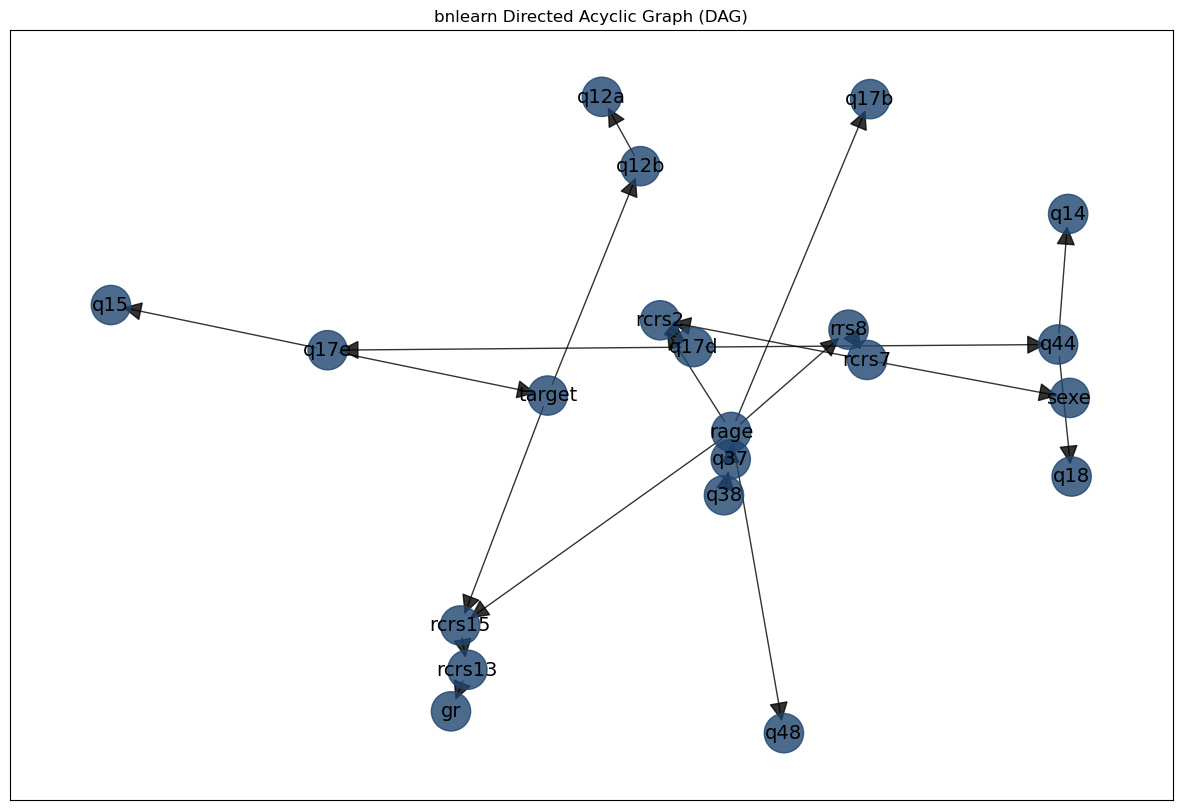

In [55]:
# Plot
G = bn.plot(smodel, interactive=False)

In [56]:
pmodel = bn.parameter_learning.fit(smodel, df2)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of q17e:
+---------+---------------------+---------------------+-----+----------------------+---------------------+
| q17d    | q17d(1)             | q17d(2)             | ... | q17d(4)              | q17d(5)             |
+---------+---------------------+---------------------+-----+----------------------+---------------------+
| q17e(1) | 0.42138939670932357 | 0.2679628064243449  | ... | 0.12078208766950489  | 0.20833333333333334 |
+---------+---------------------+---------------------+-----+----------------------+---------------------+
| q17e(2) | 0.27148080438756855 | 0.3727810650887574  | ... | 0.21665089877010407  | 0.21296296296296297 |
+---------+---------------------+---------------------+-----+----------------------+---------------------+
| q17e(3) | 0.13711151736745886 |

In [59]:
# Predict
pout = bn.predict(pmodel, df2, "target")

[bnlearn]> Remaining columns for inference: 20


100%|█████████████████████████████████████████████████████████████████████████████| 1130/1130 [00:05<00:00, 189.44it/s]


In [60]:
pout[:10]

,target,p
0,0,0.609349
1,0,0.807309
2,0,0.724182
3,0,0.588681
4,0,0.564899
5,0,0.737372
6,1,0.531372
7,1,0.697405
8,0,0.816815
9,0,0.651046


In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have the 'target' column in both df2_test and pout
actual_labels = df2['target']
predicted_labels = pout['target']

# Create the confusion matrix
confusion_mat = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[444 191]
 [237 258]]


**Train-test**

In [97]:
df2_train, df2_test = train_test_split(df2, 
                                       test_size=0.2, 
                                       stratify=df2["target"],
                                       random_state=8) 

In [98]:
len(df2_train), len(df2_test)

(1130, 4520)

In [99]:
smodel = bn.structure_learning.fit(df2_train, root_node = "target")

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


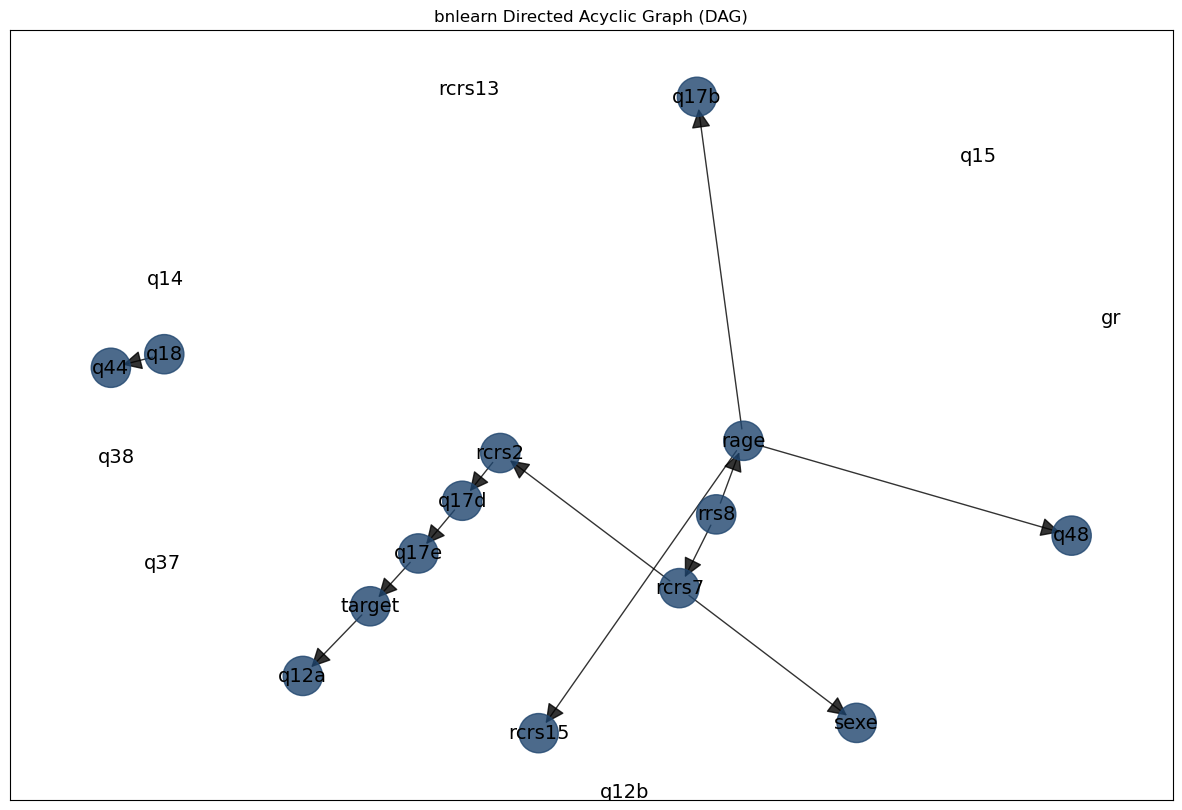

In [100]:
# Plot
G = bn.plot(smodel, interactive=False)

In [101]:
# Predict
pout = bn.predict(pmodel, df2_test, "target")

[bnlearn]> Remaining columns for inference: 20


100%|█████████████████████████████████████████████████████████████████████████████| 4520/4520 [00:28<00:00, 161.04it/s]


In [102]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have the 'target' column in both df2 and pout
actual_labels = df2_test['target']
predicted_labels = pout['target']

# Create the confusion matrix
confusion_mat = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1792  749]
 [ 860 1119]]
